## **What is LangGraph?**

LangGraph is a **framework for building stateful, controllable AI applications**.
While libraries like LangChain focus on chaining together LLM calls, LangGraph takes it further by giving you **fine-grained control over conversation flow, state transitions, and tool usage**.

It is designed around the idea that **LLMs are not just single-turn responders**—they can act as agents that **maintain memory, make decisions, and follow a defined execution plan**. With LangGraph, you can:

* **Model conversations as graphs** of states and transitions
* **Define tools and actions** the AI can call at the right time
* **Preserve state** across steps or sessions for complex workflows
* **Integrate with other systems** while keeping LLM behavior predictable

This makes LangGraph ideal for **chatbots, agents, multi-step assistants, and workflow orchestration** where context and structure matter as much as creativity.

---

## **Why Start with Type Annotation?**

Before diving into LangGraph, we need a **strong foundation in Python’s type system** because:

1. **State Management in LangGraph**

   * LangGraph uses a *State* object (often a `TypedDict`) to represent the conversation or workflow state.
   * Defining it clearly with type annotations prevents bugs and ensures the LLM and tools work with the right data.

2. **Collaboration & Maintainability**

   * Clear type hints make it easier for multiple developers to work on the same LangGraph project without confusion about what data is being passed around.

3. **Error Prevention**

   * When you define exact types for inputs, outputs, and tools, Python’s type checkers (like `mypy`) can catch mistakes before you even run the code.

4. **Better Documentation**

   * Type annotations act as built-in documentation for your code, which is crucial when defining graph nodes, edges, and tool interfaces.

In short, **LangGraph development thrives on clarity**, and Python type annotations are the first step toward building a robust, maintainable AI agent.

---

### Core Python Types for LangGraph Development

When working with LangGraph, your code will pass state, messages, and tool inputs/outputs between nodes.
Knowing how to use Python's typing tools ensures these data structures are clear, predictable, and easy to debug.

We’ll focus on five important ones:

###  1. TypedDict

What it is: A way to define dictionary keys and their types explicitly.

Why it matters in LangGraph: State in LangGraph is often defined as a TypedDict, so each piece of data in your workflow is labeled and type-safe.

In [1]:
from typing import TypedDict

class ConversationState(TypedDict):
    user_input: str
    last_intent: str
    message_count: int

state: ConversationState = {
    "user_input": "What’s the weather?",
    "last_intent": "GetWeather",
    "message_count": 1
}

In [2]:
state["user_input"]

'What’s the weather?'

### 2. Union

What it is: A way to say a variable can be one of several types.

Why it matters in LangGraph: Tool inputs and LLM responses may have more than one possible type.

In [3]:
from typing import Union

def square(x: Union[int, float]) -> float:
    return x * x

In [4]:
square(4.0)

16.0

## 3. Optional

- What it is: Shorthand for “this can be a type or None”.

- Why it matters in LangGraph: Sometimes, not all fields in your state are filled yet (e.g., user hasn’t provided their name).

In [5]:
from typing import Optional

def greet_user(name: Optional[str]) -> None:
    if name:
        print(f"Hello {name}!")
    else:
        print("Hello guest!")


def greet_user_no_name(name: Optional[str]) -> str:
    if name:
        print(f"Hello {name}!")

In [6]:
greet_user(name=None)

Hello guest!


### 4. Any

- What it is: Disables type checking for a variable (can hold anything).

- Why it matters in LangGraph: Useful for data that can’t be predicted upfront (e.g., raw LLM API output).

In [7]:
from typing import Any

def debug_log(data: Any) -> None:
    print("Debug:", data)

### 5. Lambda Functions

- What they are: Small, anonymous functions defined in a single line.

- Why it matters in LangGraph: Handy for inline data transformations, filtering results, or mapping over state items.

In [8]:
numbers = [1, 2, 3]
squares = list(map(lambda x: x * x, numbers))

## Next thing we would cover is Elements


# Elements


* **State**
  A shared data structure that holds the current information or context of the entire application. It acts as the application's memory, keeping track of variables and data that nodes can access and modify as they execute.


* **Node**
  Individual functions or operations that perform specific tasks within a graph. Each node receives input (typically the current state), processes it, and returns an updated state.


* **Graph**
  The overarching structure that maps out the connections and execution flow among different nodes (tasks).


* **Edges**
  Connections between nodes that determine the flow of execution.


* **Conditional Edges**
  Specialized connections that decide the next node to execute based on specific conditions or logic applied to the current state.


* **Start Node**
  A virtual entry point in LangGraph marking where the workflow begins. It does not perform any operation itself but serves as the designated start position of the graph execution.


* **End Node**
  Signifies the conclusion of the workflow in LangGraph. All execution stops before reaching this node, indicating that the process is complete.


* **Tools**
  Specialized functions or utilities that nodes can use to perform specific tasks, such as fetching data from an API.


* **ToolNode**
  A special kind of node whose main job is to run a tool. It connects a tool’s output back into the state so that other nodes can use the resulting information.


* **StateGraph**
  A class in LangGraph used to build and compile the graph structure. It manages nodes, edges, and overall state, ensuring that workflows operate in a unified way and that data flows correctly between components.


* **Runnable**
  A standardized executable component in LangGraph that performs a specific task within an AI workflow.


* **Messages**
  Structured inputs and outputs exchanged between agents or components, typically used to maintain context in conversational applications.



### To put it all together in `simple_agent.py`

In [9]:
from IPython import get_ipython
import io


def is_jupyter():
    """
    
    This function helps us detecct the juypter environment
    
    """
    try:
        shell = get_ipython().__class__.__name__
        return shell in ('ZMQInteractiveShell', 'Shell')
    except NameError:
        return False


if is_jupyter():
    """
    This is a conditional import for jupyter notebook
    """
    from IPython.display import Image as IPyImage, display


    def show_image(obj):
        if isinstance(obj, bytes):
            img = IPyImage(data=obj)
        else:
            img = IPyImage(filename=obj)
        display(img)

else:
    from PIL import Image as PILImage


    def show_image(obj):
        if isinstance(obj, bytes):
            img = PILImage.open(io.BytesIO(obj))
        else:
            img = PILImage.open(obj)
        img.show()

In [10]:
is_jupyter()

True

In [11]:
!pip install langgraph


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [12]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    message: str
    old_message: str
    math_mssg: int
    human_dict: dict


def math_node(state: AgentState):
    """
     This node is for giving a new user compliments.
    """
    state['math_mssg'] = 2 + 2

    state['human_dict'] = {
        "first_name": "Sam",
        "last_name": "Dada",
    }
    
    return state
    
def compliment_node(state: AgentState):
    """
     This node is for giving a new user compliments.
    """
    state['message'] = f"{state['message']}, you are an amazing person for learning LangGraph"

    return state
   
def bye_node(state: AgentState):
    """
     This node is for giving a new user compliments.
    """
    state['old_message'] = state['message']
    state['message'] = f"GoodBye"
    return state



In [13]:
graph = StateGraph(AgentState)

In [14]:
graph.add_node("compliment one", compliment_node)

In [15]:
graph.add_node("bye bye", bye_node)

In [16]:
graph.add_node("math guy", math_node)

In [17]:
graph.set_entry_point("compliment one")

In [18]:
graph.add_edge("compliment one", "math guy")

In [19]:
graph.add_edge("math guy", "bye bye")

In [20]:
graph.set_finish_point("bye bye")

In [21]:
app = graph.compile()

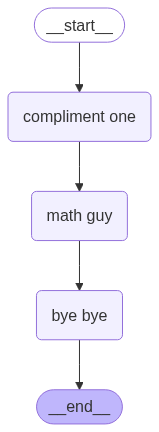

In [22]:
show_image(app.get_graph().draw_mermaid_png())

In [23]:
initial_message_state = {
    "message": "Henry"
}

agent_message = app.invoke(initial_message_state)

In [24]:
agent_message["message"]

'GoodBye'

In [25]:
agent_message["old_message"]

'Henry, you are an amazing person for learning LangGraph'

In [26]:
agent_message["math_mssg"]

4

In [27]:
agent_message["human_dict"]

{'first_name': 'Sam', 'last_name': 'Dada'}

# Next class we collect User Input

# Calculator Agent

In [28]:
class CalcAgentState(TypedDict):
    num1: int
    num2: int
    num3: int
    num4: int
    sum_result: int
    diff_result: int
    operation: str

In [29]:
def addition_node(state: CalcAgentState):
    """
        This is a node for handling addition process.
    """

    state['sum_result'] = state['num1'] +  state['num2']
    return state

In [30]:
def subtraction_node(state: CalcAgentState):
    """
        This is a node for handling subtraction process.
    """

    state['diff_result'] = state['num3'] +  state['num4']
    return state

In [31]:
class OperationError(Exception):
    """
     Error raised when users operation entry is invalid.
    """
    pass

In [32]:
def user_entry_node(state: CalcAgentState):
    """

    This node allows the user decide what they want to do.
    """

    operation = input()

    if operation == '+' or operation ==  '-':
        pass
    else:
         raise OperationError("Invalid operation detected")
    state['operation'] = operation
    return state

In [33]:
def decision_node(state: CalcAgentState):
    """

     This node selects operation depending on users decision.
     
    """
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtraction_operation"
        

In [34]:
calc_graph = StateGraph(CalcAgentState)
calc_graph.add_node('add_node', addition_node)
calc_graph.add_node('sub_node', subtraction_node)
calc_graph.add_node('user_input_node', user_entry_node)
calc_graph.add_node('decision node', lambda x: x)

In [35]:
calc_graph.set_entry_point("user_input_node")
calc_graph.add_edge("user_input_node", "decision node")
calc_graph.add_conditional_edges(
    source = 'decision node',
    path = decision_node,
    path_map = {
        # Edge: Node
        "addition_operation" : "add_node", 
        "subtraction_operation" : "sub_node"
    }
)

In [36]:
calc_graph.add_edge('decision node','sub_node')
calc_graph.add_edge('decision node','add_node')
calc_graph.add_edge('sub_node', END)
calc_graph.add_edge('add_node', END)graph

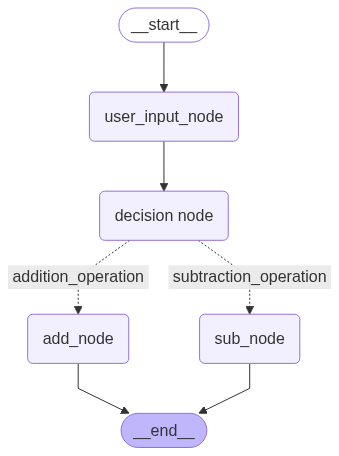

In [37]:
app = calc_graph.compile()
show_image(app.get_graph().draw_mermaid_png())